In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
data = pd.DataFrame()
symbols = ['AAPL', 'MSFT', 'DB', 'GLD']

In [3]:
for sym in symbols:
    data[sym] = dr.data.get_data_yahoo(sym,start = '2019-10-15', end = '2020-10-15')['Adj Close']
data.index.name = None
data.head()

,AAPL,MSFT,DB,GLD
2019-10-15,57.679462,139.976440,7.78,139.610001
2019-10-16,57.446606,138.829483,7.84,140.410004
2019-10-17,57.669655,138.117584,7.90,140.610001
2019-10-18,57.946632,135.863251,7.92,140.460007
2019-10-21,58.951584,136.871765,8.08,139.789993


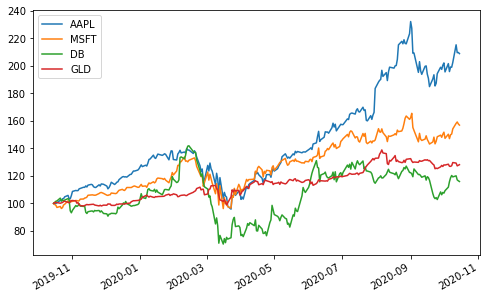

In [4]:
%matplotlib inline
(data/data.iloc[0]*100).plot(figsize=(8,5))

In [5]:
# Returns
rets = np.log(data/data.shift(1))
rets.mean() * 252

AAPL    0.733854
MSFT    0.448826
DB      0.147303
GLD     0.247105
dtype: float64

In [6]:
# Variance Covariance Matrix
rets.cov() * 252

,AAPL,MSFT,DB,GLD
AAPL,0.202425,0.163733,0.130372,0.013163
MSFT,0.163733,0.183019,0.131759,0.010223
DB,0.130372,0.131759,0.335743,0.008026
GLD,0.013163,0.010223,0.008026,0.033826


In [7]:
weights = np.random.random(4)
weights /= np.sum(weights)
weights

array([0.24943851, 0.34328068, 0.08166759, 0.32561322])

In [8]:
# Portfolio Return
np.sum(rets.mean() * weights) * 252 

0.42961533013486497

In [9]:
# Portfolio SD
p_variance = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
sd = np.sqrt(p_variance)

In [10]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

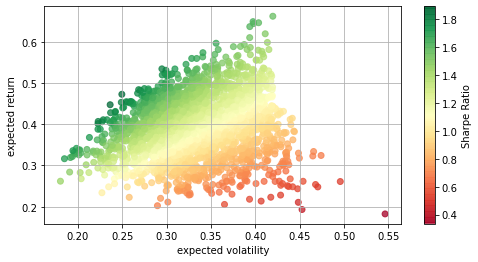

In [14]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, cmap="RdYlGn", c=prets/pvols, marker='o', alpha=0.75)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')

In [18]:
import scipy.optimize as sco
sco.minimize()

TypeError: minimize() missing 2 required positional arguments: 'fun' and 'x0'